# The Sparks Foundation-GRIP- Data Science & Business Analytics -Sep2021


# Task 1: Prediction using Supervised ML


# Author: Sreeram Sravani


# Dataset can be used downloaded from this link:- http://bit.ly/w-data


# Problem Statements


# Predict the percentage of an student based on the no. of study hours.


# What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading data from given URL link

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("data imported successfully")

data imported successfully


In [3]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Getting the information and description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Calculating the mean,median,standard deviation maximum and minimum values of the Dataset

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Finding the total columns in the set

In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

# Data Description
Hours : Continuous Predictor Variable

Score : Continuous Target Variable

# Plotting the Graph

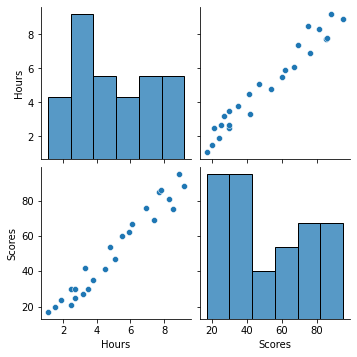

In [7]:
sns.pairplot(data)

<AxesSubplot:>

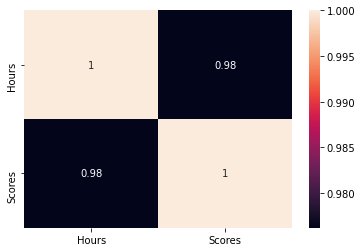

In [8]:
sns.heatmap(data.corr(),annot = True)

In [9]:
round(data.describe(),2)

,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


In [10]:
data.nunique()

Hours     23
Scores    23
dtype: int64

# Checking Missing Values

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Finding correlation

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Training Linear Regression Model

In [13]:
x=data["Hours"]
y=data["Scores"]

In [14]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

# Train and test split data

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [17]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression(normalize=True)
classifier.fit(x_train,y_train)

LinearRegression(normalize=True)

In [18]:
#printing the intercept
print(classifier.intercept_)

2.794196676599782


# Predictions

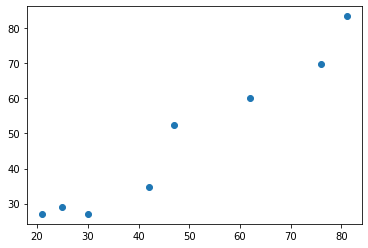

In [19]:
y_pred = classifier.predict(x_test)
plt.scatter(y_test, y_pred)

In [20]:
y_test_pred = classifier.predict(x_test)
y_train_pred = classifier.predict(x_train)

print("Test set evaluation:\n_________")
print(y_test,y_test_pred)
print("train set evaluation:\n_________")
print(y_train,y_train_pred)


Test set evaluation:
_________
[81 30 21 76 62 25 42 47] [83.39168645 27.07054902 27.07054902 69.79692914 60.0863882  29.0126572
 34.83898177 52.31795545]
train set evaluation:
_________
[35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88] [39.69425223 17.36000808 33.86792767 46.49163089 89.21801101 85.33379464
 36.78108995 29.0126572  21.24422446 49.40479317 62.02849639 78.53641598
 56.20217183 77.56536189 13.47579171 74.65219961 92.13117329]


# Prediction of score when a student studies for 9.25 hours

In [24]:
#Test with your own data
Hours = [[9.25]]
own_pred = classifier.predict(Hours)
print("no of Hours = {}".format(Hours))
print("predicted score ={}".format(own_pred[0]))

no of Hours = [[9.25]]
predicted score =92.61670033840096


# Results from model creation

In [21]:
res_data=pd.DataFrame(data=[["LinearRegression",(y_test,y_test_pred)]],columns=['Hours','Scores'])
res_data

,Hours,Scores
0,LinearRegression,"([81, 30, 21, 76, 62, 25, 42, 47], [83.3916864..."


Comparing Actual vs predicted

In [22]:
data=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
data

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


# Evaluating the Model

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.499999999999999


# THANK YOU!